# Dummy Variables

![](banner_dummy_3.jpg)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)                      
options(digits=10, scipen=100) # expose many digits, use scientific notation sparingly
update_geom_defaults("point", list(size=3, colour="grey50"))

== document setup ==

## Introduction

## Synopsis

You can convert any categorical variable to a set of numerical dummy variables, without loss of information. 

## Exposition

### Data

Consider this dataset and new observation.

In [2]:
x2_labels = c("A","B","C")
class_labels = c("D","E")

data = data.frame(x1=c(1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0),
                  x2=factor(c("A","B","C","A","A","B","C","C"), x2_labels),
                  class=factor(c("D","D","D","E","E","D","D","E"), class_labels))
new = data.frame(x1=5.0, x2=factor("B", x2_labels))

size(data)
row.arrange(data %>% captionx, new %>% captionx)

observations,variables
8,3


data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 1.0 
 A 
 D 
 
 
 2.0 
 B 
 D 
 
 
 3.0 
 C 
 D 
 
 
 4.0 
 A 
 E 
 
 
 6.0 
 A 
 E 
 
 
 6.5 
 B 
 D 
 
 
 7.0 
 C 
 D 
 
 
 9.0 
 C 
 E 
 
 
 
 new 
 
 
 x1 
 x2 
 
 
 
 
 5 
 B

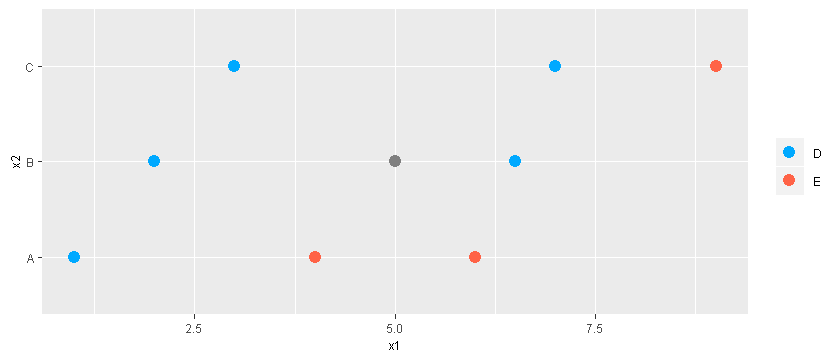

In [3]:
ggplot(data) + geom_point(aes(x=x1, y=x2, color=class)) + geom_point(aes(x=new$x1, y=new$x2), color="grey50") +
scale_color_manual(values=PALETTE)

### Convert Numeric Variable to Dummy Variables 

Choose a categorical variable to convert.  For each potential label, create a new numerical variable.  For each of these new numerical variables, set its values to 0's or 1's, corresponding the original categorical variable labels.  Then remove the original categorical variable.    

In [4]:
data.d = dummify(data[,c("x1","x2")], drop=FALSE, omit.constants=FALSE)
data.d$class = data$class
data.d %>% caption("data (dummified)")

x1,x2A,x2B,x2C,class
1.0,1,0,0,D
2.0,0,1,0,D
3.0,0,0,1,D
4.0,1,0,0,E
6.0,1,0,0,E
6.5,0,1,0,D
7.0,0,0,1,D
9.0,0,0,1,E


Then remove the first new column because is represents redundant information.

Here, we remove x2A because its values are already implied by x2B and x2C.  Specifically, x2B=0, x2C=0 means x2A=1; x2B=1,x2C=0 means x2A=0; x2B=0,x2C=1 means x2A=0. 

In [5]:
data.d$x2A = NULL
data.d %>% caption("data (dummified, reduced)")

x1,x2B,x2C,class
1.0,0,0,D
2.0,1,0,D
3.0,0,1,D
4.0,0,0,E
6.0,0,0,E
6.5,1,0,D
7.0,0,1,D
9.0,0,1,E


### New Observations

Similarly, convert any new observations to the same form.

In [6]:
new.d = dummify(new, drop=FALSE, omit.constants=FALSE)
new.d %>% caption("new (dummified)")

x1,x2A,x2B,x2C
5,0,1,0


In [7]:
new.d$x2A = NULL
new.d %>% caption("new (dummified, reduced)")

x1,x2B,x2C
5,1,0


## Code

* `data.frame`: https://www.rdocumentation.org/packages/base/versions/3.4.3/topics/data.frame
* `dim`:https://www.rdocumentation.org/packages/base/versions/3.4.3/topics/dim
* `dummy.data.frame`: https://cran.r-project.org/web/packages/dummies/dummies.pdf
* `str`: https://www.rdocumentation.org/packages/utils/versions/3.4.3/topics/str
* `table`: https://www.rdocumentation.org/packages/base/versions/3.4.3/topics/table

### Useful Functions

In [8]:
# help(dummy.data.frame, package="dummies")

## Expectations

Know about this:

* how to construct a table with numerical and categorical variables, using R
* how to convert categorical variables to dummy variables, conceptually and using R

## Further Reading

* https://www.moresteam.com/WhitePapers/download/dummy-variables.pdf

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised August 29, 2019
</span>
</p>